### Sentiment analysis behind reviews

In [1]:
# importing important libraries 

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# extracting data 
df  = pd.read_csv('EcoPreprocessed.csv')
df.head()

,Unnamed: 0,review,polarity,division
0,3870,able play youtube alexa,0.5000,positive
1,62,able recognize indian accent really well drop ...,0.2794,positive
2,487,absolute smart device amazon connect external ...,0.1827,positive
3,3204,absolutely amaze new member family control hom...,0.3682,positive
4,1265,absolutely amaze previously sceptical invest m...,0.2333,positive


In [3]:
# Cleaning the data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4084 entries, 0 to 4083
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4084 non-null   int64  
 1   review      4084 non-null   object 
 2   polarity    4084 non-null   float64
 3   division    4084 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 127.8+ KB


In [5]:
df.describe()

,Unnamed: 0,polarity
count,4084.000000,4084.000000
mean,2070.871205,0.350653
std,1203.976943,0.367858
min,0.000000,-1.000000
25%,1024.750000,0.006725
50%,2061.500000,0.383300
75%,3119.250000,0.607100
max,4156.000000,1.000000


In [6]:
# checking duplicate values

df.duplicated().sum()

0

In [7]:
# removing unnecessary columns
df.columns

Index(['Unnamed: 0', 'review', 'polarity', 'division'], dtype='object')

In [8]:
df.drop(['Unnamed: 0','polarity'],axis=1,inplace=True)

In [9]:
df.head()

,review,division
0,able play youtube alexa,positive
1,able recognize indian accent really well drop ...,positive
2,absolute smart device amazon connect external ...,positive
3,absolutely amaze new member family control hom...,positive
4,absolutely amaze previously sceptical invest m...,positive


In [10]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [11]:
df['sentiment'] = encode.fit_transform(df["division"])

In [12]:
df.head()

,review,division,sentiment
0,able play youtube alexa,positive,2
1,able recognize indian accent really well drop ...,positive,2
2,absolute smart device amazon connect external ...,positive,2
3,absolutely amaze new member family control hom...,positive,2
4,absolutely amaze previously sceptical invest m...,positive,2


### EDA

In [13]:
df['review'].str.len()

0        23
1       259
2       164
3        81
4       106
       ... 
4079     54
4080     13
4081     51
4082     95
4083     75
Name: review, Length: 4084, dtype: int64

In [14]:
df["word_len"] = df['review'].str.split().str.len()

In [15]:
df.sample(5)

,review,division,sentiment,word_len
4070,ya like much but point view bite expensive buy...,positive,2,51
2633,no doubt best,positive,2,3
3049,product cant much play songs fail tell distanc...,negative,0,29
2519,nice product affordable price,positive,2,4
491,best device recognition voice perfect,positive,2,5


<AxesSubplot:xlabel='division', ylabel='count'>

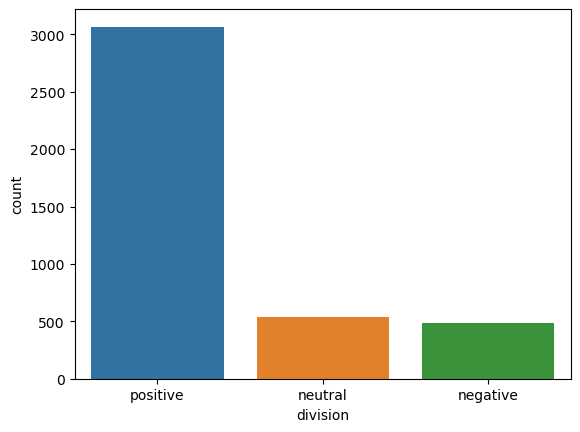

In [16]:
sns.countplot(data =df,x='division')

### NOTE
From this graph we know that data is unbalanced. So, when we train our model the probability of possitive comments is way more than neutral and negative comments.
In this case our model will always predict the comment is possitive, therefore model will be baised.

To over come this problem either we have to find another dataset with balanced data or add more negative and neutral comments in this dataframe.

# ****Optional ****

In [17]:
# So in this case I added new data of negative and neutral comments

In [18]:
new_df = pd.read_csv("Dataset.csv")

In [19]:
new_df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [20]:
new_df.drop(["product_name","product_price","Rate","Review"],axis=1,inplace=True)

In [21]:
new_df.head()

,Summary,Sentiment
0,great cooler excellent air flow and for this p...,positive
1,best budget 2 fit cooler nice cooling,positive
2,the quality is good but the power of air is de...,positive
3,very bad product its a only a fan,negative
4,ok ok product,neutral


In [22]:
new_df['sentiment'] = encode.fit_transform(new_df["Sentiment"])

In [23]:
new_df.head()

,Summary,Sentiment,sentiment
0,great cooler excellent air flow and for this p...,positive,2
1,best budget 2 fit cooler nice cooling,positive,2
2,the quality is good but the power of air is de...,positive,2
3,very bad product its a only a fan,negative,0
4,ok ok product,neutral,1


In [24]:
new_df['sentiment'].value_counts()

2    166581
0     28232
1     10239
Name: sentiment, dtype: int64

In [25]:
df['sentiment'].value_counts()

2    3066
1     536
0     482
Name: sentiment, dtype: int64

In [26]:
neutral = new_df[new_df['sentiment'] == 1]

In [27]:
negative = new_df[new_df['sentiment'] == 0]

In [28]:
neutral['word_count'] = neutral['Summary'].str.split().str.len()
neutral.head()

C:\Users\PRITAM VERMA\AppData\Local\Temp\ipykernel_16376\358188608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neutral['word_count'] = neutral['Summary'].str.split().str.len()


,Summary,Sentiment,sentiment,word_count
4,ok ok product,neutral,1,3.0
129,average production,neutral,1,2.0
151,speed is very slow,neutral,1,4.0
181,built quality is not up to the mark overall av...,neutral,1,10.0
189,cooling very late n water will come slowly,neutral,1,8.0


In [29]:
negative['word_count'] = negative['Summary'].str.split().str.len()
negative.head()

C:\Users\PRITAM VERMA\AppData\Local\Temp\ipykernel_16376\3370760237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative['word_count'] = negative['Summary'].str.split().str.len()


,Summary,Sentiment,sentiment,word_count
3,very bad product its a only a fan,negative,0,8
8,very bad cooler,negative,0,3
32,bad quality,negative,0,2
48,small wire and moter capacity is very low fan ...,negative,0,30
53,received dalay 10 days cooler is ok when i was...,negative,0,13


In [30]:
neutral['word_count'].describe()

count    10234.000000
mean         6.341118
std         10.421547
min          1.000000
25%          1.000000
50%          3.000000
75%          7.000000
max        104.000000
Name: word_count, dtype: float64

In [31]:
neutral = neutral[neutral['word_count'] > 8]

In [32]:
negative['word_count'].describe()

count    28232.000000
mean        10.749504
std         14.353389
min          1.000000
25%          3.000000
50%          5.000000
75%         12.000000
max        106.000000
Name: word_count, dtype: float64

In [33]:
negative = negative[negative['word_count'] > 30]

In [34]:
neutral.duplicated().sum()

110

In [35]:
# Removing duplicate values

neutral = neutral.drop_duplicates()

In [36]:
neutral.duplicated().sum()

0

In [37]:
negative.duplicated().sum()

165

In [38]:
negative = negative.drop_duplicates()

In [39]:
negative.duplicated().sum()

0

In [40]:
negative.shape

(2055, 4)

In [41]:
neutral.shape

(1873, 4)

### Now the data is ready to merge with original dataset

In [42]:
new_df = pd.concat([neutral,negative])

In [43]:
# rename the columns for concination.
new_df.columns = ['review', 'division', 'sentiment','word_len']

In [44]:
new_df.head()

,review,division,sentiment,word_len
181,built quality is not up to the mark overall av...,neutral,1,10.0
323,nice cooling nice products but body isnt prope...,neutral,1,9.0
436,size too big guuz so much bigger than expected...,neutral,1,15.0
498,room is not cooling cooler is throughing only ...,neutral,1,10.0
560,leaves a fishy smell sometimes which is unbear...,neutral,1,11.0


In [45]:
new_df['sentiment'].value_counts()

0    2055
1    1873
Name: sentiment, dtype: int64

In [46]:
final_df = pd.concat([df,new_df])

In [47]:
final_df['sentiment'].value_counts()

2    3066
0    2537
1    2409
Name: sentiment, dtype: int64

In [48]:
final_df.head()

,review,division,sentiment,word_len
0,able play youtube alexa,positive,2,4.0
1,able recognize indian accent really well drop ...,positive,2,39.0
2,absolute smart device amazon connect external ...,positive,2,25.0
3,absolutely amaze new member family control hom...,positive,2,12.0
4,absolutely amaze previously sceptical invest m...,positive,2,15.0


<AxesSubplot:xlabel='division', ylabel='count'>

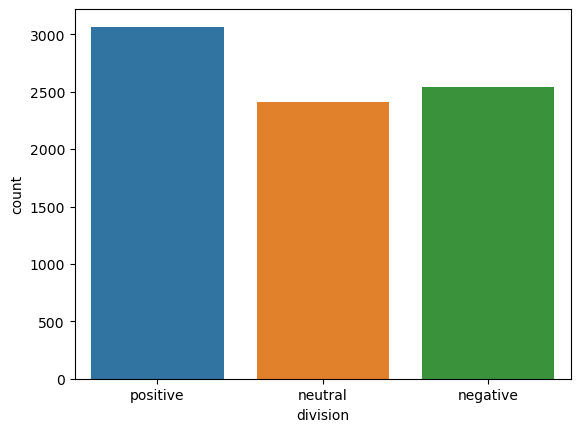

In [49]:
sns.countplot(data = final_df,x='division')

#### Now the data looks fine the comments are quite balanced and ready for further process.

<AxesSubplot:xlabel='word_len', ylabel='count'>

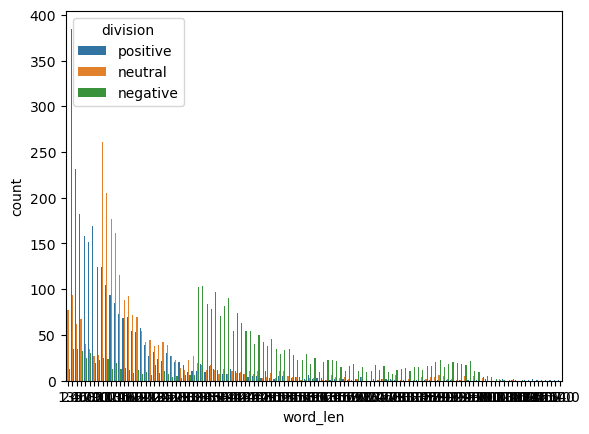

In [50]:
sns.countplot(data=final_df,x = 'word_len',hue="division")

<AxesSubplot:ylabel='Frequency'>

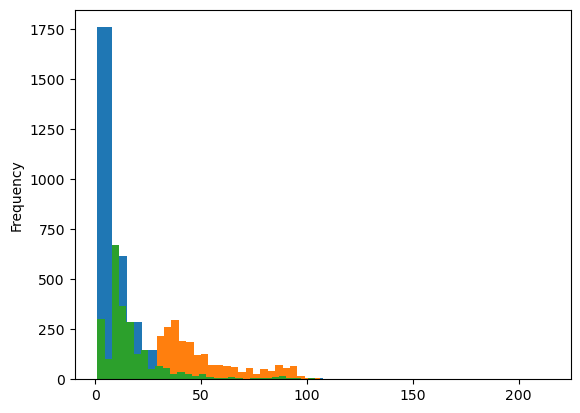

In [51]:
final_df[final_df['division'] == 'positive']['word_len'].plot(kind = "hist",bins = 30)
final_df[final_df['division'] == 'negative']['word_len'].plot(kind = "hist",bins = 30)
final_df[final_df['division'] == 'neutral']['word_len'].plot(kind = "hist",bins = 30)

In [52]:
'''

Text preprocessing 
1. lower case 
2. remove specal character and punctuation
3. stopwords 
4. strmming or lemmatization 

''' 

'\n\nText preprocessing \n1. lower case \n2. remove specal character and punctuation\n3. stopwords \n4. strmming or lemmatization \n\n'

In [53]:
import re
import nltk
from nltk.corpus import stopwords

In [54]:
stopword = stopwords.words("english")

def processing(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]','',text)  # removes all the puncuation and special character.
    text = text.split()
    text = [word for word in text if word not in stopword]
    return ' '.join(text)


In [55]:
final_df['processed_test'] = final_df['review'].apply(processing)

In [56]:
# Applying stemming 

from nltk.stem import PorterStemmer

In [57]:
stemmer = PorterStemmer()
def stem_text(text):
    tokens = nltk.word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return " ".join(stemmed_tokens)

In [58]:
final_df['processed_test'] = final_df['review'].apply(stem_text)

In [59]:
final_df.head()

,review,division,sentiment,word_len,processed_test
0,able play youtube alexa,positive,2,4.0,abl play youtub alexa
1,able recognize indian accent really well drop ...,positive,2,39.0,abl recogn indian accent realli well drop func...
2,absolute smart device amazon connect external ...,positive,2,25.0,absolut smart devic amazon connect extern sub ...
3,absolutely amaze new member family control hom...,positive,2,12.0,absolut amaz new member famili control home vo...
4,absolutely amaze previously sceptical invest m...,positive,2,15.0,absolut amaz previous sceptic invest money but...


In [60]:
# next step would be Text preprocessing 

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

BOW = CountVectorizer()
TFIDF = TfidfVectorizer()

In [87]:
# bag of words
X = TFIDF.fit_transform(final_df['review']).toarray()
y = np.asarray(final_df['sentiment'])

In [88]:
X.shape,y.shape

((8012, 14225), (8012,))

In [89]:
# Now the Final step is to train the model

from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [91]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB

bnb = BernoulliNB()
mnb = MultinomialNB()

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [93]:
bnb.fit(X_train,y_train)
prediction = bnb.predict(X_test)
print(accuracy_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

0.8222390317700454
[[ 597   46  140]
 [  89  553  192]
 [   3    0 1024]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       783
           1       0.92      0.66      0.77       834
           2       0.76      1.00      0.86      1027

    accuracy                           0.82      2644
   macro avg       0.85      0.81      0.81      2644
weighted avg       0.84      0.82      0.82      2644



In [94]:
mnb.fit(X_train,y_train)
prediction = mnb.predict(X_test)
print(accuracy_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

0.7182299546142209
[[ 667   15  101]
 [ 454  225  155]
 [  13    7 1007]]
              precision    recall  f1-score   support

           0       0.59      0.85      0.70       783
           1       0.91      0.27      0.42       834
           2       0.80      0.98      0.88      1027

    accuracy                           0.72      2644
   macro avg       0.77      0.70      0.66      2644
weighted avg       0.77      0.72      0.68      2644



In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [96]:
RFC = RandomForestClassifier()
SVM = SVC()

In [97]:
RFC.fit(X_train,y_train)
prediction = RFC.predict(X_test)
print(accuracy_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

0.8804841149773072
[[ 680   39   64]
 [  94  640  100]
 [   4   15 1008]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       783
           1       0.92      0.77      0.84       834
           2       0.86      0.98      0.92      1027

    accuracy                           0.88      2644
   macro avg       0.89      0.87      0.88      2644
weighted avg       0.88      0.88      0.88      2644



In [ ]:
I have tried with both BOW AND TF-idf vectorizer and couples of traning algorithms, but the Random forest is 
performing best among these all algos, but there 